<a href="https://colab.research.google.com/github/AnnaVitali/Explainable_AI_Example/blob/master/Tree_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpreting Tree Models

Decision tree are intrinsically explainable since each prediction can be described as a series of decision points for the models features, ultimately leading to the final prediction.

In [ ]:
!pip install treeinterpreter
!pip install pydotplus

In [ ]:
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import pydotplus

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor

from treeinterpreter import treeinterpreter as ti

from IPython.display import Image

## Regression Task

We'll see how the ooutput of the decision tree can be explained for regression tasks.

In [ ]:
cal_housing = fetch_california_housing()
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
X = cal_housing.data
y = cal_housing.target
cal_features = cal_housing.feature_names

df = pd.concat((pd.DataFrame(X, columns = cal_features), pd.DataFrame({'MedianHouseVal': y})), axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Visualizing the Decision Tree

The process starts at the root node of the tree and each subsequent nonleaf node splits the data so that when you reach the leaf node you have a predicted outcome. In this way it is possible to follow the precise decision splits through the tree and explain how the features ultimately contributed to a certain predicion.

We can see in this case that the most importante feature is `MedInc` followed by `AveOccup` and `AveRooms`.

We can also notice that a feature can be used for more than one split, or it might not be used at all, like the `Populaton`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[cal_features], y, test_size = 0.2)

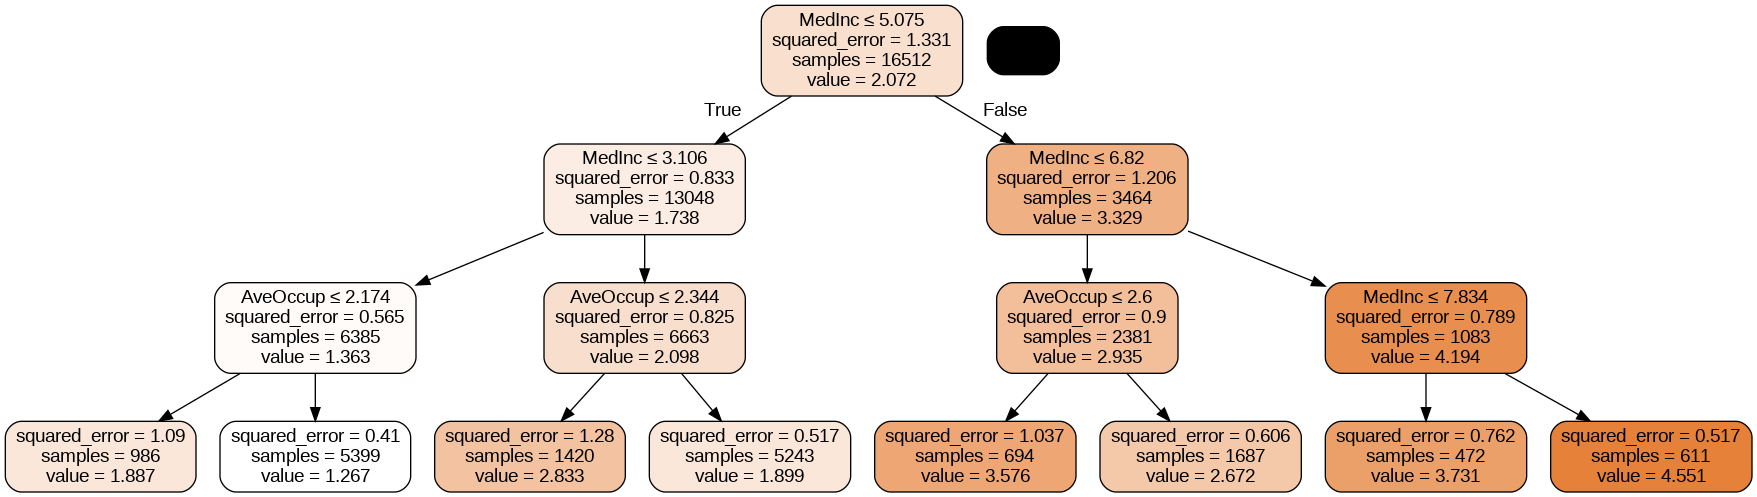

In [ ]:
dt_reg = DecisionTreeRegressor(max_depth = 3)
dt_reg.fit(X_train, y_train)

dot_data = export_graphviz(dt_reg, out_file='ca_housing.dot',
                           feature_names = cal_features,
                           filled = True, rounded = True,
                           special_characters = True,
                           leaves_parallel = False)
graph = pydotplus.graphviz.graph_from_dot_file('ca_housing.dot')
Image(graph.create_png())

Make a sample prediction

In [ ]:
X_test[cal_features].iloc[[0]].transpose()

,935
MedInc,3.1696
HouseAge,17.0000
AveRooms,4.0700
AveBedrms,0.9700
Population,307.0000
AveOccup,3.0700
Latitude,37.5000
Longitude,-122.0400


The value of the root node is the mean of the labels taken from training data. This is the initial bias of the model. To explain the prediction for this or any given instance, we start at the root node and add or subtract the feature  contributions for each node in the decision path.

In [ ]:
y_train.mean()

2.0705845385174415

# Random Forest

The story becomes more complicated once we move from simple decision trees to ensambles techniques like random forest and gradient-boosted trees.

Random forests use a bagging ensamble technique where many decision trees are trained in parallel and then their predicions are aggregated to create the final modelprediction.

The main idea behaind explainability of decision trees is that any prediction outcome can be traced from the root node, through the various node decision points, and ulitmately to the leaf that determines the prediction. For random forests, since the prediction is the average of the predictions of all the trees in the forests, the explanation of the predicion is simply the average of the bias terms plus the average of the contributions of each feature within each tree

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
print(f'Instance 11 prediction: {rf_reg.predict(X_test.iloc[[11]])}')
print(f'Instance 17 prediction: {rf_reg.predict(X_test.iloc[[17]])}')

Instance 11 prediction: [3.3773114]
Instance 17 prediction: [2.47414]
